### Assumption for Linear Regression
1. Linear Data  x increase -> y increase<br>
2. No outlier (homoscedastic)<br>
3. No endogeneity<br>
4. No autocorrelation (n trends like monday sales less friday sales ore)<br>
5. No multicollinearity <br>
x1 related to y , x2 related to y ,if  x1 and x2 are related consider only one variable for prediction. House rice related to area , house price related number of rooms <br>
 Variance Inflation Factor (VIF) to address multicollinearity 
Y = m1x1+m2x2+c


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df= pd.read_csv("Salary_Data.csv")

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# store value of YearsExperiences in x and salary in y 

In [7]:
x=df.iloc[: ,0:1].values
y=df.iloc[:,1:].values
x ,y

(array([[ 1.1],
        [ 1.3],
        [ 1.5],
        [ 2. ],
        [ 2.2],
        [ 2.9],
        [ 3. ],
        [ 3.2],
        [ 3.2],
        [ 3.7],
        [ 3.9],
        [ 4. ],
        [ 4. ],
        [ 4.1],
        [ 4.5],
        [ 4.9],
        [ 5.1],
        [ 5.3],
        [ 5.9],
        [ 6. ],
        [ 6.8],
        [ 7.1],
        [ 7.9],
        [ 8.2],
        [ 8.7],
        [ 9. ],
        [ 9.5],
        [ 9.6],
        [10.3],
        [10.5]]),
 array([[ 39343],
        [ 46205],
        [ 37731],
        [ 43525],
        [ 39891],
        [ 56642],
        [ 60150],
        [ 54445],
        [ 64445],
        [ 57189],
        [ 63218],
        [ 55794],
        [ 56957],
        [ 57081],
        [ 61111],
        [ 67938],
        [ 66029],
        [ 83088],
        [ 81363],
        [ 93940],
        [ 91738],
        [ 98273],
        [101302],
        [113812],
        [109431],
        [105582],
        [116969],
        [112635],
        [12239

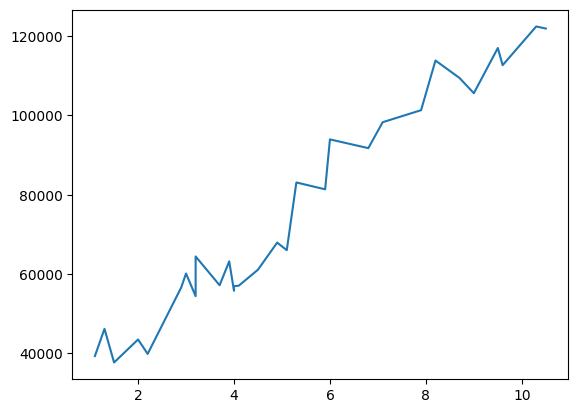

In [8]:
plt.plot(x,y)
plt.show()

In [9]:
# dividing the x and y dataset into 80:20 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2)
print("x_train : ",x_train)
print("x_test : ",x_test)
print("y_train : ",y_train)
print("y_test : ",y_test)

x_train :  [[ 3.2]
 [ 3.2]
 [ 7.1]
 [ 8.7]
 [10.5]
 [ 8.2]
 [ 4.1]
 [10.3]
 [ 4. ]
 [ 1.1]
 [ 4.5]
 [ 3. ]
 [ 3.7]
 [ 2.9]
 [ 9.5]
 [ 2.2]
 [ 5.3]
 [ 7.9]
 [ 4.9]
 [ 5.9]
 [ 1.5]
 [ 9.6]
 [ 6. ]
 [ 1.3]]
x_test :  [[5.1]
 [9. ]
 [3.9]
 [4. ]
 [2. ]
 [6.8]]
y_train :  [[ 64445]
 [ 54445]
 [ 98273]
 [109431]
 [121872]
 [113812]
 [ 57081]
 [122391]
 [ 55794]
 [ 39343]
 [ 61111]
 [ 60150]
 [ 57189]
 [ 56642]
 [116969]
 [ 39891]
 [ 83088]
 [101302]
 [ 67938]
 [ 81363]
 [ 37731]
 [112635]
 [ 93940]
 [ 46205]]
y_test :  [[ 66029]
 [105582]
 [ 63218]
 [ 56957]
 [ 43525]
 [ 91738]]


In [10]:
# training lr model on x_train and y_train dataset
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
# predicting the valye of y for x_test dataset 
y_predicted=lr.predict(x_test)
y_predicted

array([[ 74765.53206323],
       [111669.74156025],
       [ 63410.39067953],
       [ 64356.65246151],
       [ 45431.41682201],
       [ 90851.98235681]])

In [12]:
y_test

array([[ 66029],
       [105582],
       [ 63218],
       [ 56957],
       [ 43525],
       [ 91738]])

In [13]:
# let us find the difference betwwen the predicted value and original value i.e difference between y_test and y_predicted

In [14]:
new_df=pd.DataFrame(x_test,columns=['Experience'])
new_df['Salary']=y_test
new_df['predicted_salary']=y_predicted
new_df['salary_difference']=new_df['Salary']-new_df['predicted_salary']
new_df

,Experience,Salary,predicted_salary,salary_difference
0,5.1,66029,74765.532063,-8736.532063
1,9.0,105582,111669.741560,-6087.741560
2,3.9,63218,63410.390680,-192.390680
3,4.0,56957,64356.652462,-7399.652462
4,2.0,43525,45431.416822,-1906.416822
5,6.8,91738,90851.982357,886.017643


In [15]:
# finding the accuracy in the prediction
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_predicted)
print(accuracy*100)

93.51898860283335


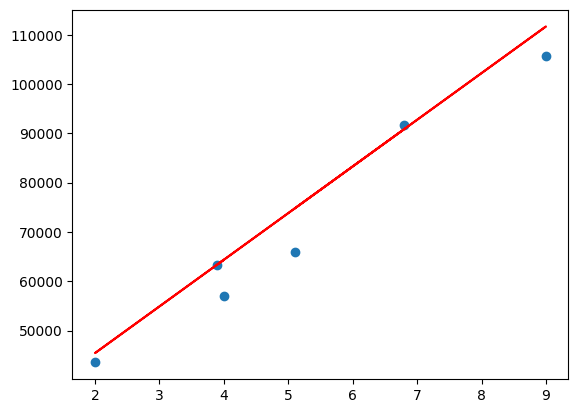

In [16]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predicted,'r')

<Axes: >

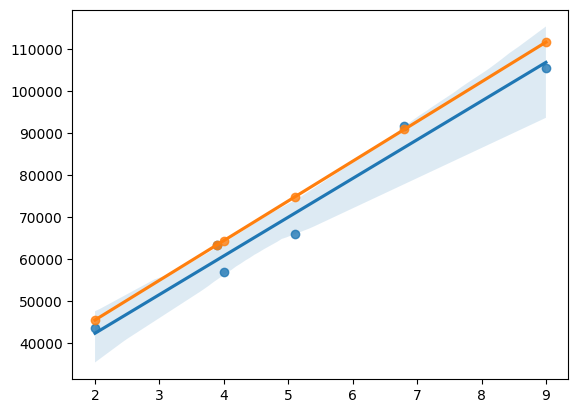

In [28]:
import seaborn as sns
sns.regplot(x=x_test,y=y_test)
sns.regplot(x=x_test,y=y_predicted)

In [18]:
# y=mx+c
lr.coef_.reshape(1)

array([9462.61781975])

In [19]:
lr.intercept_.shape

(1,)

In [20]:
# verify the coeficient
print(new_df)
new_df['check_Experience']=new_df['Experience']*lr.coef_.reshape(1)+ lr.intercept_
new_df

   Experience  Salary  predicted_salary  salary_difference
0         5.1   66029      74765.532063       -8736.532063
1         9.0  105582     111669.741560       -6087.741560
2         3.9   63218      63410.390680        -192.390680
3         4.0   56957      64356.652462       -7399.652462
4         2.0   43525      45431.416822       -1906.416822
5         6.8   91738      90851.982357         886.017643


,Experience,Salary,predicted_salary,salary_difference,check_Experience
0,5.1,66029,74765.532063,-8736.532063,74765.532063
1,9.0,105582,111669.741560,-6087.741560,111669.741560
2,3.9,63218,63410.390680,-192.390680,63410.390680
3,4.0,56957,64356.652462,-7399.652462,64356.652462
4,2.0,43525,45431.416822,-1906.416822,45431.416822
5,6.8,91738,90851.982357,886.017643,90851.982357


In [21]:
salary_final_prediction=lr.predict(x)

In [22]:
data= df.copy()

In [23]:
data['Prediction']=salary_final_prediction
data['Difference']=data['Salary']-data['Prediction']
data

,YearsExperience,Salary,Prediction,Difference
0,1.1,39343,36915.060784,2427.939216
1,1.3,46205,38807.584348,7397.415652
2,1.5,37731,40700.107912,-2969.107912
3,2.0,43525,45431.416822,-1906.416822
4,2.2,39891,47323.940386,-7432.940386
5,2.9,56642,53947.772860,2694.227140
6,3.0,60150,54894.034642,5255.965358
7,3.2,54445,56786.558206,-2341.558206
8,3.2,64445,56786.558206,7658.441794
9,3.7,57189,61517.867116,-4328.867116


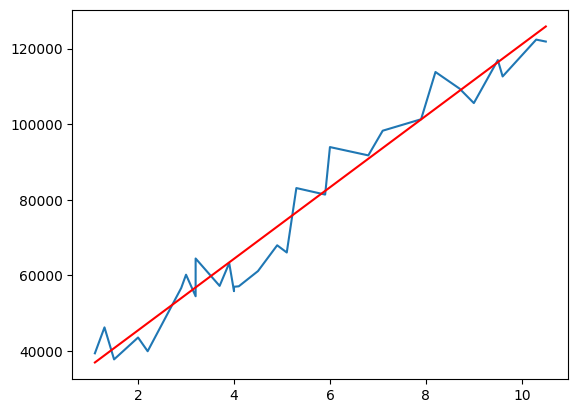

In [24]:
plt.plot(x,y)
plt.plot(x,salary_final_prediction,'r')

In [25]:
r2_score(y,salary_final_prediction)*100

95.61148771763777

In [27]:
data.to_excel('Prediction.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'

In [26]:
lr.predict([[0]])

array([[26506.18118251]])